# **Binary Image Classification with Vision Transformer (ViT)**

This notebook demonstrates the process of training a Vision Transformer (ViT) for binary image classification, utilizing a [**dataset**](https://www.kaggle.com/datasets/andymatte/bbb-synthetic-deepfake-320k/suggestions?status=pending) from Kaggle. It covers data preprocessing, model creation, training, evaluation, and visualization of the model's decision-making process using Grad-CAM.

The key steps covered in this notebook include:

* **Dataset Download**: Downloading and preparing the dataset for training and evaluation.
* **Data Preprocessing**: Loading and preparing the dataset, including data modification and normalization.
* **Model Creation**: Building the Vision Transformer model, including defining the Multi-Layer Perceptron (MLP), Patch Extraction, and Patch Encoding layers.
* **Model Definition**: Compiling and defining the Vision Transformer model architecture.
* **Results**: Training and evaluating the model using various metrics such as accuracy, AUC, precision, recall, and F1 score, and visualizing important regions in the images influencing the model's predictions using Grad-CAM.


# **Useful modules import**
First of all, it is necessary to import useful modules used during the tutorial.

In [ ]:
!pip install keras==3.*

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 27.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.



Below are descriptions of the modules and libraries used in the notebook:


* `numpy` - Used for complex mathematical operations and handling multi-dimensional arrays.

* `matplotlib`.pyplo - Graphing library for data visualization.

* `matplotlib` - Base package for visualization.

* `tensorflow.keras.layers` - Module for defining neural network layers in the TensorFlow framework.

* `pandas` - Library for data manipulation and analysis.

* `random` - Module for generating random numbers.

* `time` - Module for manipulating times and dates.

* `glob` - Module for finding all paths that match a specific pattern.

* `os` - Module for interacting with the operating system.

* `cv2 (OpenCV)` - Library for processing images and videos.

* `sklearn.model_selection.train_test_split` - Function to split data into training and test sets.

* `tensorflow, tensorflow.keras` - Frameworks for machine learning and deep learning.

* `tensorflow.keras.backend` - Provides access to backend-specific functions of Keras.

* `tensorflow.keras.utils` - Utility functions for Keras.

* `tensorflow.keras.utils.Sequence` - Class to define data generators.

* `google.colab.files` - Module for uploading and downloading files in Colab.

* `keras.layers, keras.ops` - Keras modules for defining operations and neural network layers.

* `jax` - Library for high-performance numerical computations.

* `sklearn.metrics.confusion_matrix, ConfusionMatrixDisplay` - Tools for evaluating the performance of classification models.

* `IPython.display.Image, display` - Functions to display images and outputs in notebooks.

* `google.colab.drive` - Module to mount Google Drive in Colab.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow.keras.layers as L
import pandas as pd
import random
import time
import glob
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import Sequence
import tensorflow as tf
import glob
import random
from google.colab import files
from keras import layers
from keras import ops
import jax
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import tensorflow as tf
from IPython.display import Image, display


from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Utility Functions**



*   **countImages(path)** - counts and returns the number of PNG images in a specified directory. It uses the glob module to search for .png files within the given path.
*   **load_dataset()** - creates and returns a list of tuples, each containing an image path and its associated class label. It processes specific directories named 'KL01_160K' and 'KL234_160K', each mapped to labels 0 and 1, respectively. The function uses the glob module to find all PNG images within these directories.
* **load_and_preprocess_image(img_path)** - loads an image from a given path, converts its color from BGR to RGB, and crops the image. The cropping removes 45 pixels from the top and bottom, adjusting the image dimensions. The function uses OpenCV for image manipulation tasks.
* **print_biclass_cardinality(sano_count, protesi_count)** - prints the total count of images and individual counts for two classes, 'Sano' and 'Protesi', from the dataset.


In [ ]:
def countImages(path):
    return [len(glob.glob(os.path.join(path, '*.png')))]

def load_dataset():
    image_class_pairs = []
    for class_name, label in zip(['KL01_160K', 'KL234_160K'], [0, 1]):
        image_paths = glob.glob(f'/content/{class_name}/*.png')
        image_class_pairs.extend([(path, label) for path in image_paths])
    return image_class_pairs

def load_and_preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img[45:-45, :]
    return img

def print_biclass_cardinality(sano_count, protesi_count):
    sano = sano_count[0]
    protesi = protesi_count[0]
    print(f'Total cardinality of the dataset: {sano + protesi}')
    print(f'   Sano: {sano}')
    print(f'   Protesi: {protesi}')

# **Dataset**

The [**Synthetic_(DeepFake)_320k**](https://www.kaggle.com/datasets/andymatte/bbb-synthetic-deepfake-320k/suggestions?status=pending), containing X-ray images of knee joints with varying degrees of osteoarthritis severity, will be used.

The following code loads the dataset into memory.

## **Dataset Download**

Below is the code to download the dataset from Kaggle. This includes the following operations:

- Installation of necessary libraries, such as kaggle, opendatasets, and Pillow;
- Loading the JSON file with the Kaggle token;
- Creation of the necessary directory to download the dataset from Kaggle. The file with the token is copied into the directory with read and write permissions;
- Download of the dataset;
- Unzipping the dataset and deleting the .zip file;

In [ ]:
!pip install kaggle
!pip install opendatasets
!pip install Pillow

In [ ]:
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d andymatte/bbb-synthetic-deepfake-320k

!unzip -q bbb-synthetic-deepfake-320k.zip -d /content

!rm /content/bbb-synthetic-deepfake-320k.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/andymatte/bbb-synthetic-deepfake-320k
License(s): unknown
100% 8.51G/8.51G [08:10<00:00, 19.8MB/s]
100% 8.51G/8.51G [08:10<00:00, 18.7MB/s]


## **Dataset Cardinality**

This code sets up the number of classes for a dataset as 2. It counts the number of images in two specific directories, '/content/KL01_160K' and '/content/KL234_160K', using the *countImages* function defined earlier. After obtaining the counts, it calls the print_biclass_cardinality function to display the total number of images and the count for each class. This helps in assessing the distribution of the dataset across the two categories

In [ ]:
num_classes = 2

sano_count = countImages('/content/KL01_160K')
protesi_count = countImages('/content/KL234_160K')

print_biclass_cardinality(sano_count, protesi_count)


Total cardinality of the dataset: 320000
   Sano: 160000
   Protesi: 160000


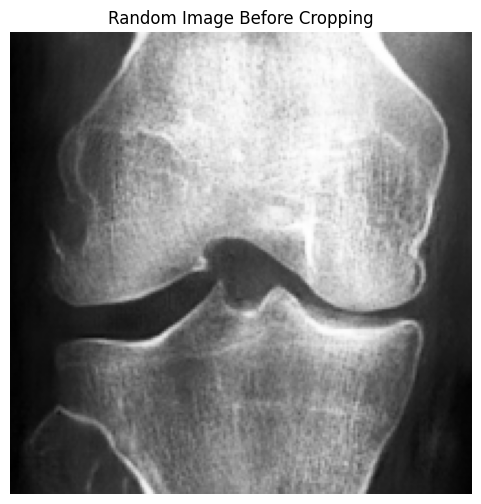

In [ ]:
import matplotlib.pyplot as plt

# Display a random image before cropping
random_image_path = random.choice(glob.glob('/content/KL01_160K/*.png') + glob.glob('/content/KL234_160K/*.png'))
image = cv2.imread(random_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.title('Random Image Before Cropping')
plt.axis('off')
plt.show()


This cell handles the loading of the dataset by calling the *load_dataset* function, which retrieves a list of image paths paired with their class labels.

In [ ]:
image_class_pairs = load_dataset()

print(f"Number of images loaded: {len(image_class_pairs)}")
if len(image_class_pairs) == 0:
    print("No images found. Check the dataset paths.")


Number of images loaded: 320000


# **Creating Training, Validation and Test Sets and Dataset Preparation**

This code shuffles the dataset and splits it into **training**, **validation**, and **test** sets based on predefined proportions.

These proportions are chosen to ensure that there is enough data for the model to learn effectively (training set), validate the model during training to tune hyperparameters (validation set), and finally evaluate the model's performance on unseen data (test set).

In [ ]:
# Shuffle the dataset
random.shuffle(image_class_pairs)

# Split dataset into train, validation, and test sets
train_split, val_split, test_split = 0.7, 0.15, 0.15
num_samples = len(image_class_pairs)
num_train = int(train_split * num_samples)
num_val = int(val_split * num_samples)
num_test = int(test_split * num_samples)

train_image_class_pairs = image_class_pairs[:num_train]
val_image_class_pairs = image_class_pairs[num_train:num_train + num_val]
test_image_class_pairs = image_class_pairs[num_train + num_val:]

# Debug: print the size of each dataset split
print(f"Train set size: {len(train_image_class_pairs)}")
print(f"Validation set size: {len(val_image_class_pairs)}")
print(f"Test set size: {len(test_image_class_pairs)}")

# Separate paths and classes for each set
if train_image_class_pairs:
    train_image_paths, train_y = zip(*train_image_class_pairs)
else:
    train_image_paths, train_y = [], []

if val_image_class_pairs:
    val_image_paths, val_y = zip(*val_image_class_pairs)
else:
    val_image_paths, val_y = [], []

if test_image_class_pairs:
    test_image_paths, test_y = zip(*test_image_class_pairs)
else:
    test_image_paths, test_y = [], []



Train set size: 224000
Validation set size: 48000
Test set size: 48000


Defines a **DataGenerator** class to efficiently load and preprocess batches of images during model training, based on specified batch size and data properties


 The **DataGenerator** class includes a method to shuffle the dataset indices at the end of each epoch. Shuffling the data at the end of each epoch helps prevent the model from learning the order of the data, which can lead to overfitting. By presenting the data in a different order each epoch, the model generalizes better and learns more robust features, improving its performance on unseen data.

In [ ]:
class DataGenerator(Sequence):
    # Initialize the data generator
    def __init__(self, image_paths, labels, batch_size=32, dim=(120, 210), n_channels=3, shuffle=True):
        self.image_paths = image_paths
        self.labels = labels
        self.batch_size = batch_size
        self.dim = dim
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    # Return the number of batches per epoch
    def __len__(self):
        return int(np.floor(len(self.image_paths) / self.batch_size))

    # Fetch a batch of data
    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        batch_image_paths = [self.image_paths[k] for k in indexes]
        batch_labels = [self.labels[k] for k in indexes]

        X, y = self.__data_generation(batch_image_paths, batch_labels)
        return X, y

    # Shuffle indexes after each epoch
    def on_epoch_end(self):
        self.indexes = np.arange(len(self.image_paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    # Generate data for a batch
    def __data_generation(self, batch_image_paths, batch_labels):
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size, 1), dtype=int)

        for i, (img_path, label) in enumerate(zip(batch_image_paths, batch_labels)):
            img = load_and_preprocess_image(img_path)
            X[i,] = img
            y[i,] = label

        return X, y





Initializes data generators for the training, validation, and test sets with specified batch sizes and shuffling settings, then prints the size of each dataset split.

In [ ]:
batch_size = 256

train_generator = DataGenerator(train_image_paths, train_y, batch_size=batch_size)
val_generator = DataGenerator(val_image_paths, val_y, batch_size=batch_size, shuffle=False)
test_generator = DataGenerator(test_image_paths, test_y, batch_size=batch_size, shuffle=False)

# Print dataset sizes
print(f"Train set size: {len(train_image_class_pairs)}")
print(f"Validation set size: {len(val_image_class_pairs)}")
print(f"Test set size: {len(test_image_class_pairs)}")


Train set size: 224000
Validation set size: 48000
Test set size: 48000


# **Data Preprocessing**

## **Image Cropping**


Cropping involves adjusting the size of images by removing portions of the image to focus on key features or to meet model input requirements. It standardizes images to a consistent size, enhancing model training and performance

Process:
1. **Cropping Implementation**: The cropping is performed within the ***load_and_preprocess_image(img_path)*** function called by the ***DataGenerator*** class. This function loads an image, converts it to the RGB format, and crops it to the desired dimensions before the image is used for training.
2. **Batch Processing**: The ***DataGenerator*** processes images in batches. Each image in the batch is cropped during loading using the load_and_preprocess_image function, ensuring consistency across the dataset.

By performing cropping during the image loading phase within the ***DataGenerator***, the process ensures that all images are consistently resized before being fed into the neural network. Visual verification helps confirm that this preprocessing step aligns with the project's requirements and the model's need

This code configures the Keras environment to use JAX as the backend, prints versions of Keras and JAX, the device used, and sets the input dimensions for cropped images.

In [ ]:
# Configure Keras to use JAX as the backend
os.environ["KERAS_BACKEND"] = "jax"

# Print the versions of Keras, JAX, and the device in use
print("Keras version:", keras.__version__)
print("JAX version:", jax.__version__)
print("Device:", jax.devices())

# Define the number of classes and input dimensions after cropping
input_shape = (120, 210, 3)  # Image dimensions after cropping
print(f"Updated input_shape: {input_shape}")



Keras version: 3.4.1
JAX version: 0.4.26
Device: [cuda(id=0)]
Updated input_shape: (120, 210, 3)


In [ ]:
print(f"Train generator batch shape: {train_generator[0][0].shape}")
print(f"Validation generator batch shape: {val_generator[0][0].shape}")
print(f"Test generator batch shape: {test_generator[0][0].shape}")

Train generator batch shape: (256, 120, 210, 3)
Validation generator batch shape: (256, 120, 210, 3)
Test generator batch shape: (256, 120, 210, 3)


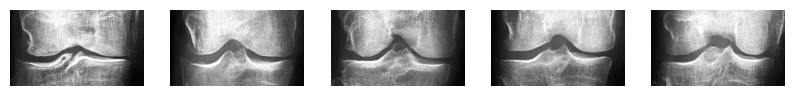

In [ ]:
def display_random_cropped_images(generator, num_images=5):
    batch = generator[0][0]  # Prende il primo batch di immagini
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        idx = np.random.randint(0, batch.shape[0])
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(batch[idx].astype('uint8'))
        plt.axis("off")
    plt.show()


display_random_cropped_images(train_generator)

## **Data Modification**

In [ ]:
image_size = (36, 72)
patch_size = 6

In this cell, *data modificatin* techniques are applied to increase the variability and robustness of the dataset. Operations such as resizing, random rotation, and random zoom help the model learn to generalize better by exposing it to a wider range of variations in the input data. This reduces overfitting and improves the model's performance on new, unseen data by simulating different real-world scenarios.

In [ ]:
# Set up data data_modification and normalization configuration
data_modification = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(36, 72),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_modification",
)

# Calculate the mean and variance of the training data for normalization
for batch, _ in train_generator:
    data_modification.layers[0].adapt(batch)
    break  # Adapt only the first batch to avoid loading too many images into memory


print("Data normalization layer adapted to the training data.")


Data normalization layer adapted to the training data.


# **Model Creation**

This section defines essential components for constructing a neural network model that processes image patches. The components include:

* **MLP (Multi-Layer Perceptron)** - A function to apply dense layers with dropout.
* **Patches Layer** - A custom layer to extract non-overlapping patches from images.
* **Patch Encoder** - A custom layer to project patches into a higher-dimensional space and add positional embeddings for spatial information.


These components are crucial for building a model that can process images in smaller, more manageable pieces (patches), facilitating the handling of larger images and enhancing model performance.

## **Implement Multilayer Perceptron (MLP)**

This cell defines a function to create a **Multi-Layer Perceptron (MLP)**. The MLP is used in the transformer blocks of the Vision Transformer (ViT) to perform non-linear transformations on the data. It consists of a series of dense layers with activation and dropout to enhance the model's learning capacity and reduce overfitting.

The MLP layers are placed after the self-attention layers in the transformer block. The dense layers with activation functions and dropout help the model learn complex patterns by introducing non-linearity and preventing overfitting, thereby enhancing the learning capacity of the model.

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=keras.activations.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x



## **Patch Creation layer**



This cell defines a class to create the **Patches Layer**. The **Patches Layer** is responsible for dividing the input image into fixed-size patches. This step is crucial because the Vision Transformer (ViT) processes images as a sequence of patches, similar to how transformers in NLP process sequences of words.

In [ ]:
# CELLA 15

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID'
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config

### Sample Image Visualization

Image shape: (120, 210, 3)
Image size: 36 X 72
Patch size: 6 X 6
Patches per image: 72
Elements per patch: 108


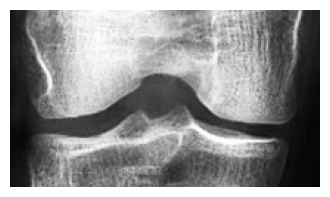

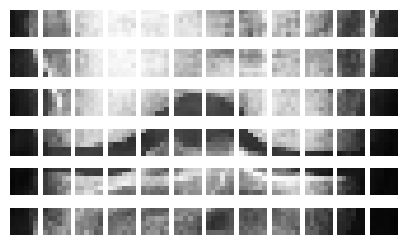

In [ ]:
plt.figure(figsize=(4, 4))
batch = train_generator[0][0]  # Get the first batch of images
image = batch[0]  # Get one of the images from the batch
print("Image shape:", image.shape)
plt.imshow(image.astype("uint8"))
plt.axis("off")

# Using the new image size for resizing
resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size[0], image_size[1])
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size[0]} X {image_size[1]}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

# Calculate the number of patches per row and column
num_patches_h = image_size[0] // patch_size
num_patches_w = image_size[1] // patch_size

plt.figure(figsize=(5, 3))
for i, patch in enumerate(patches[0]):
    row = i // num_patches_w
    col = i % num_patches_w
    ax = plt.subplot(num_patches_h, num_patches_w, row * num_patches_w + col + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")
plt.show()




### Analysis of Image Patch Division

The resized 36x72 pixel image is divided into 72 patches, each 6x6 pixels. This division creates a grid of 6x12 patches (36/6 = 6 rows, 72/6 = 12 columns), covering the entire image without overlaps.
The image shows the 72 generated patches, arranged in 6 rows and 12 columns below the original image. Each patch contains 108 elements because:
- Each patch is 6x6 pixels = 36 pixels
- There are 3 color channels (RGB) per pixel
- Thus, 36 pixels x 3 channels = 108 elements per patch


#### Deductions on Effectiveness
This patch division can make image processing more effective for several reasons:
1. *Captures local details*: Each patch represents a specific area of the image, allowing the model to focus on local features.
2. *Reduces complexity*: Analyzing small patches is computationally more efficient than processing the entire high-resolution image.
3. *Facilitates learning spatial relationships*: The model can learn how different parts of the image relate to each other.
4. *Increases robustness*: The model becomes less sensitive to small variations or shifts in the image.

## **Patch Encoding layer**


This cell defines a class to create the **Patch Encoder Layer**. The **Patch Encoder Layer** is responsible for projecting the patches into a higher-dimensional space and adding positional embeddings. These operations are crucial for preserving the spatial information of the patches and allowing the Vision Transformer (ViT) model to learn the spatial relationships between different parts of the image. The positional embedding ensures that the model retains an awareness of the position of each patch within the original image, thereby facilitating a better understanding of the global context

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({
            "num_patches": self.num_patches,
            "projection_dim": self.projection.units,
        })
        return config


# **Model Definition**

A **Vision Transformer (ViT)** is a type of deep learning model designed for image classification tasks. Unlike traditional convolutional neural networks (CNNs) that use convolutional layers to process images, **ViT** uses the transformer architecture originally designed for natural language processing (NLP). **ViT** splits an image into fixed-size patches, linearly embeds each of them, and then processes them as a sequence of embeddings through transformer layers. This approach allows **ViT** to capture long-range dependencies in images more effectively than CNNs

**Model Composition Highlights:**
* **Multi-Layer Perceptron (MLP)**: The function mlp creates a multi-layer perceptron used in the transformer layers for non-linear transformations and feature extraction. It consists of dense layers with activation and dropout.
* **Patch Extraction (Patches Layer)**: The class class Patches is responsible for dividing the input image into smaller fixed-size patches. This step transforms the 2D image into a sequence of patches that can be processed by the transformer.
* **Patch Encoding (PatchEncoder Layer)**: The class class PatchEncoder projects the patches into a higher-dimensional space and adds positional embeddings. This step ensures that the spatial information of the patches is preserved and effectively utilized by the transformer layers.


This is an example image to describe the structure:


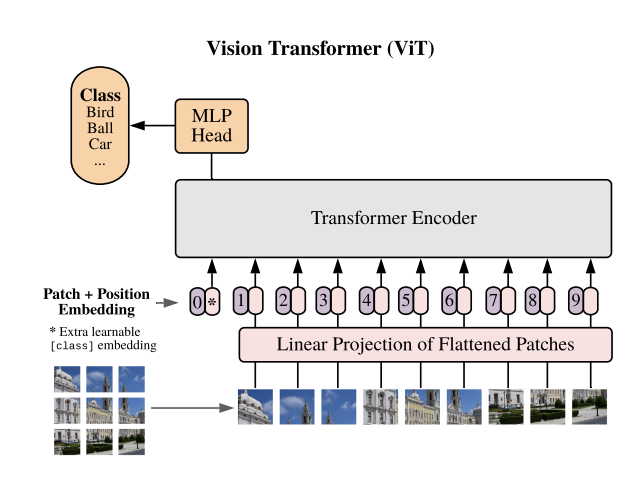


## **Hyperparameters Configurations**

This code sets up and prints various hyperparameters and configurations needed for training a transformer-based model on image data. These parameters include learning rate, batch size, image size, patch size, and the architecture details for the transformer and the final classifier.

* `learning_rate`: The step size used by the optimizer to update model weights during training.
* `weight_decay`: A regularization parameter to prevent overfitting by penalizing large weights.
batch_size: The number of samples processed before the model is updated.
* `num_epochs`: The number of complete passes through the training dataset.
image_size: The dimensions to which input images will be resized.
* `patch_size`: The dimensions of patches extracted from the resized images.
num_patches: The total number of patches derived from an image, based on the image and patch sizes.
* `projection_dim`: The dimension of the vector to which each patch is projected.
num_heads: The number of attention heads in the transformer model.
* `transformer_units`: The sizes of the hidden layers in the transformer block.
transformer_layers: The number of transformer layers in the model.
* `mlp_head_units`: The sizes of the hidden layers in the Multi-Layer Perceptron (MLP) head of the model.


Changing these hyperparameters can significantly affect the model's performance. For instance, a higher learning rate might speed up training but could lead to instability, while a lower learning rate might make training slower but more stable. Adjusting the batch size can affect the convergence speed and generalization of the model

In [ ]:
learning_rate = 0.001
weight_decay = 0.001
batch_size = 256
num_epochs = 3

num_patches = (image_size[0] // patch_size) * (image_size[1] // patch_size)
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]
transformer_layers = 8
mlp_head_units = [
    2048,
    1024,
]

print(f"learning_rate: {learning_rate}")
print(f"weight_decay: {weight_decay}")
print(f"batch_size: {batch_size}")
print(f"num_epochs: {num_epochs}")
print(f"image_size: {image_size}")
print(f"patch_size: {patch_size}")
print(f"num_patches: {num_patches}")
print(f"projection_dim: {projection_dim}")
print(f"num_heads: {num_heads}")
print(f"transformer_units: {transformer_units}")
print(f"transformer_layers: {transformer_layers}")
print(f"mlp_head_units: {mlp_head_units}")



learning_rate: 0.001
weight_decay: 0.001
batch_size: 256
num_epochs: 3
image_size: (36, 72)
patch_size: 6
num_patches: 72
projection_dim: 64
num_heads: 4
transformer_units: [128, 64]
transformer_layers: 8
mlp_head_units: [2048, 1024]


## **Build the ViT model**

This section defines a function to create a Vision Transformer (ViT) classifier model. The process involves:

1. **Data Modification**: Modifies the input data to improve model robustness.
2. **Patch Extraction**: Extracts non-overlapping patches from the augmented images.
3. **Patch Encoding**: Encodes patches with positional embeddings to retain spatial information.
4. **Transformer Layers**: Applies multiple transformer layers consisting of multi-head attention, layer normalization, MLP, and skip connections.
5. **Representation Layer**: Normalizes, flattens, and applies dropout to the final encoded patches.
6. **MLP Head**: Adds an MLP head with dropout and increased L2 regularization for feature extraction.
7. **Classification Layer**: Adds a dense layer with sigmoid activation for binary classification.1

In [ ]:
def create_vit_classifier():
    inputs = keras.Input(shape=input_shape)
    # Augment data.
    augmented = data_modification(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.2
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.2)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP with increased L2 regularization.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.02))(features)  # Aumenta la regularizzazione L2
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

vit_classifier = create_vit_classifier()



## **Model Visualitazion**

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(vit_classifier, show_shapes=True, show_layer_names=True, expand_nested=True)

Output hidden; open in https://colab.research.google.com to view.

## **Load Model**

This code loads the previously saved model weights from a specified path.



In [ ]:
"""
vit_classifier = create_vit_classifier()

drive.mount('/content/drive', force_remount=True)

# Specifica il percorso in Google Drive dove salvare i pesi del modello
weights_save_path = '/content/drive/MyDrive/3epochs.weights.h5'

# Carica i pesi del modello
vit_classifier.load_weights(weights_save_path)

print(f'Weights loaded from {weights_save_path}')

"""

## **Model Compile**

This code defines a function to compile the model, specifying the optimizer, loss function, and evaluation metrics.

In [ ]:
def compile_model(model):
    # Define the optimizer with learning rate and weight decay
    optimizer = keras.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    # Compile the model with binary crossentropy loss and evaluation metrics
    model.compile(
        optimizer=optimizer,
        loss=keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=[
            keras.metrics.BinaryAccuracy(name="accuracy"),
            keras.metrics.AUC(name="auc"),
            keras.metrics.Precision(name="precision"),
            keras.metrics.Recall(name="recall")
        ],
    )

# Create and compile the ViT model
vit_classifier = create_vit_classifier()
compile_model(vit_classifier)


## **Model Train**

This code defines a function to train the model. It sets up callbacks for saving the best weights, reducing the learning rate, and early stopping.

In [ ]:
def train_model(model):
    checkpoint_filepath = "/tmp/checkpoint.weights.h5"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_generator,
        epochs=num_epochs,
        validation_data=val_generator,
        callbacks=[checkpoint_callback, early_stopping],
        verbose=1
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, auc, precision, recall = model.evaluate(test_generator)
    f1_score = 2 * (precision * recall) / (precision + recall)

    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test AUC: {round(auc * 100, 2)}%")
    print(f"Test Precision: {round(precision * 100, 2)}%")
    print(f"Test Recall: {round(recall * 100, 2)}%")
    print(f"Test F1 Score: {round(f1_score * 100, 2)}%")

    return history

history = train_model(vit_classifier)

# Print training and validation metrics epoch by epoch
for epoch in range(len(history.history['loss'])):
    print(f"Epoch {epoch+1}")
    print(f" - train_loss: {history.history['loss'][epoch]}")
    print(f" - val_loss: {history.history['val_loss'][epoch]}")
    print(f" - train_accuracy: {history.history['accuracy'][epoch]}")
    print(f" - val_accuracy: {history.history['val_accuracy'][epoch]}")


Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


875/875 ━━━━━━━━━━━━━━━━━━━━ 996s 1s/step - accuracy: 0.7484 - auc: 0.8234 - loss: 0.6286 - precision: 0.7520 - recall: 0.7417 - val_accuracy: 0.9807 - val_auc: 0.9986 - val_loss: 0.0712 - val_precision: 0.9718 - val_recall: 0.9899 - learning_rate: 0.0010
Epoch 2/3
875/875 ━━━━━━━━━━━━━━━━━━━━ 939s 1s/step - accuracy: 0.9418 - auc: 0.9860 - loss: 0.1523 - precision: 0.9422 - recall: 0.9418 - val_accuracy: 0.9889 - val_auc: 0.9996 - val_loss: 0.0367 - val_precision: 0.9957 - val_recall: 0.9819 - learning_rate: 0.0010
Epoch 3/3
875/875 ━━━━━━━━━━━━━━━━━━━━ 954s 1s/step - accuracy: 0.9622 - auc: 0.9934 - loss: 0.1015 - precision: 0.9628 - recall: 0.9617 - val_accuracy: 0.9931 - val_auc: 0.9998 - val_loss: 0.0209 - val_precision: 0.9882 - val_recall: 0.9980 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 3.
187/187 ━━━━━━━━━━━━━━━━━━━━ 151s 807ms/step - accuracy: 0.9941 - auc: 0.9998 - loss: 0.0200 - precision: 0.9904 - recall: 0.9978
Test accuracy: 99.33%
T

## **Weight Saving**

This code mounts Google Drive and saves the trained model weights to a specified path

In [ ]:
"""
# Save model weights to Google Drive
weights_save_path = '/content/drive/MyDrive/320kDataset_3epochs.weights.h5'

# Save the model weights
vit_classifier.save_weights(weights_save_path)

print(f'Weights saved to {weights_save_path}')
"""

# **Results**

In this section, we use several metrics to evaluate the performance of our binary classification model. The chosen metrics help us better understand how the model performs in different aspects of classification. Here is a list of the metrics used and their importance:

* **Accuracy**: Represents the proportion of correct predictions out of the total predictions. It is a general metric that indicates how often the model makes the right prediction.

* **AUC (Area Under the Curve)**: Measures the model's ability to distinguish between classes. A higher AUC indicates a better ability of the model to discriminate between positive and negative classes.

* **Precision**: Indicates the proportion of correct positive predictions out of the total positive predictions. It is important in scenarios where false positives have a high cost.

* **Recall**: Represents the proportion of correct positive predictions out of the total actual positives. It is crucial in contexts where capturing all positives is essential, even at the cost of some false positives.

* **F1 Score**: It is the harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when a compromise between the two is needed.

This code defines a function to plot and visualize the training and validation loss and accuracy over epochs.

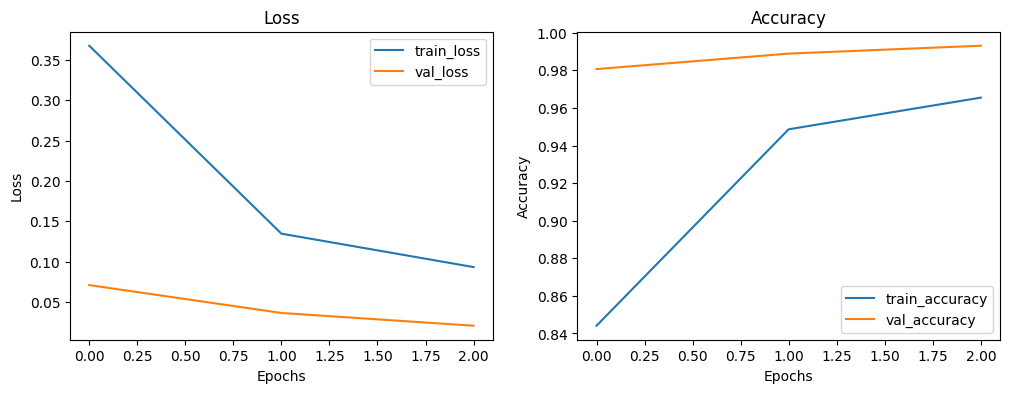

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Plot training history
plot_history(history)


This code predicts the labels on the test set, converts probabilities to binary classes, and generates a confusion matrix to evaluate the model's performance

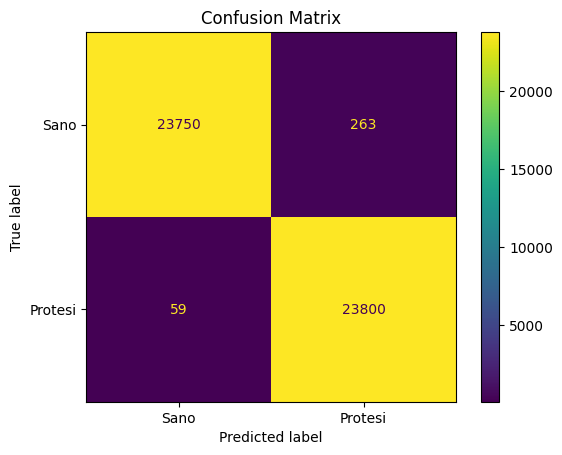

In [ ]:
# Predict labels on the test set
y_pred = []
y_true = []

for batch_x, batch_y in test_generator:
    preds = vit_classifier.predict_on_batch(batch_x)
    y_pred.extend(preds)
    y_true.extend(batch_y)
    if len(y_true) >= test_generator.__len__() * test_generator.batch_size:
        break

y_pred = np.array(y_pred)
y_true = np.array(y_true)

# Convert probabilities to binary classes
y_pred_classes = (y_pred > 0.5).astype("int32")

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=["Sano", "Protesi"])

# Display confusion matrix
cmd.plot()
plt.title('Confusion Matrix')
plt.show()


## **Grad-Cam**


**Grad-CAM** (Gradient-weighted Class Activation Mapping) is a visualization technique used to understand and interpret the decisions made by deep learning models, particularly convolutional neural networks (CNNs). Grad-CAM provides a heatmap that highlights the regions of an image that were most important for the model's prediction. Here is a list of what Grad-CAM does and why it is useful:

*What Grad-CAM does:*

* **Generates Heatmaps**: Uses the gradients flowing backward from the model's output through the last convolutional layers to generate a weighted activation map. This map shows which parts of the image contributed most to the final decision.
* **Highlights Important Regions**: The heatmap overlaid on the original image highlights the areas that the model considers most relevant for classification.

*Why we used Grad-CAM:*

* **Model Interpretability**: Grad-CAM helps visualize and understand the model's internal workings, allowing us to see which features of the image the model focused on to make a prediction.
* **Debugging and Reliability**: Using Grad-CAM, we can verify if the model is making decisions based on relevant features and not on artifacts or noise. This is particularly important to ensure the model is reliable and robust.
* **Communication with Non-Experts**: Grad-CAM heatmaps are useful for explaining the model's decisions to people who are not experts in deep learning, improving transparency and trust in the model.



In [ ]:
# Set Keras backend to TensorFlow
os.environ["KERAS_BACKEND"] = "tensorflow"


This cell defines functions to generate a Grad-CAM heatmap for an image. The `get_img_array` function loads and preprocesses the image, while `make_gradcam_heatmap` computes the heatmap by obtaining the gradients of the class score with respect to the output feature map of the last convolutional layer. The heatmap highlights the regions in the image that are important for the model's prediction

### Explanation of CELL 26

This cell contains two main functions: `get_img_array` and `make_gradcam_heatmap`.

1. **`get_img_array`**: This function loads and preprocesses an image using the `load_and_preprocess_image` function, then adds a batch dimension to make the image compatible with the model input.
2. **`make_gradcam_heatmap`**: This function generates a Grad-CAM heatmap to visualize the regions of the image that contributed most to the model's prediction. The function:
   - Creates a model that maps the input image to the activations of the last relevant convolutional layer and the output predictions.
   - Computes the gradient of the predicted class channel with respect to the activations of the last convolutional layer.
   - Calculates the average intensity of the gradient over each channel in the feature map.
   - Multiplies each channel in the feature map by the average intensity of the gradient and sums all the channels to obtain the class activation map.
   - Reshapes the heatmap to match the size of the patches and normalizes it for visualization purposes.


In [ ]:
def get_img_array(img_path):
    # Load and preprocess the image
    img = load_and_preprocess_image(img_path)
    # Convert the image to an array and add a batch dimension
    array = np.expand_dims(img, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations
    # of the last relevant layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute the gradient of the top predicted class for the input image
    # with respect to the activations of the last relevant layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the predicted class with regard to
    # the output feature map of the last convolutional layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))

    # Multiply each channel in the feature map array
    # by "how important this channel is" with regard to the predicted class
    # then sum all the channels to obtain the class activation map
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = tf.reduce_sum(last_conv_layer_output * pooled_grads, axis=-1)

    # Reshape the heatmap to fit the patches
    heatmap = tf.reshape(heatmap, (6, 12))  # Reshape to fit the 6x12 patches

    # For visualization purposes, normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()



In this cell, a new image is processed for Grad-CAM visualization. The model's prediction for this image is printed, and the corresponding Grad-CAM heatmap is generated and displayed. This process helps interpret the model's decision for this specific image by highlighting the areas of the image that contributed most to the prediction.

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: [0]


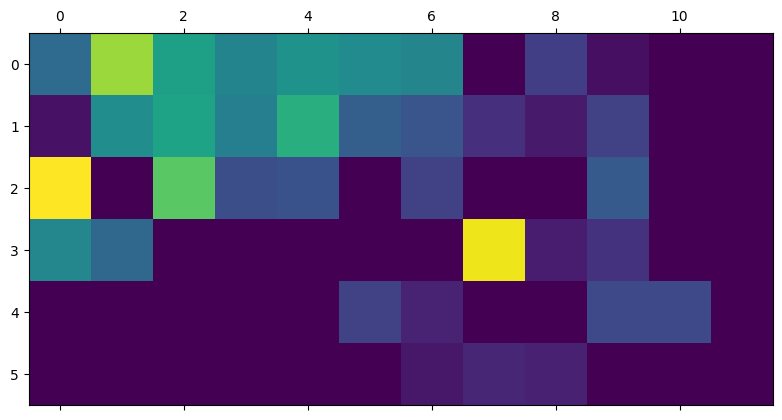

In [ ]:
# Load the example image
img_path = test_image_paths[8]
img_array = get_img_array(img_path)

# Use your pre-trained ViT model
model = vit_classifier

# Ensure the model does not use softmax in the last layer
model.layers[-1].activation = None

# Print the predicted class
preds = model.predict(img_array)
predicted_class = (preds[0] > 0.5).astype("int32")
print("Predicted class:", predicted_class)

# Generate the Grad-CAM heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name="patch_encoder_1")

# Display the heatmap
plt.matshow(heatmap)
plt.show()




This cell defines a function to save and display the Grad-CAM heatmap superimposed on the original image. The function:

1. **Loading and Preprocessing**: Loads and preprocesses the original image using `load_and_preprocess_image`.
2. **Heatmap Resizing**: Resizes the heatmap to match the size of the original image.
3. **Heatmap Conversion to RGB**: Converts the heatmap to RGB format using the Jet colormap.
4. **Image Creation with Heatmap**: Creates an image with the colorized heatmap in RGB format.
5. **Superimposing Heatmap**: Superimposes the heatmap on the original image by blending them.
6. **Saving the Image**: Saves the superimposed image to a specified path.
7. **Displaying Grad-CAM**: Displays the Grad-CAM using Matplotlib with a larger figure size and hides the axes for better visualization.


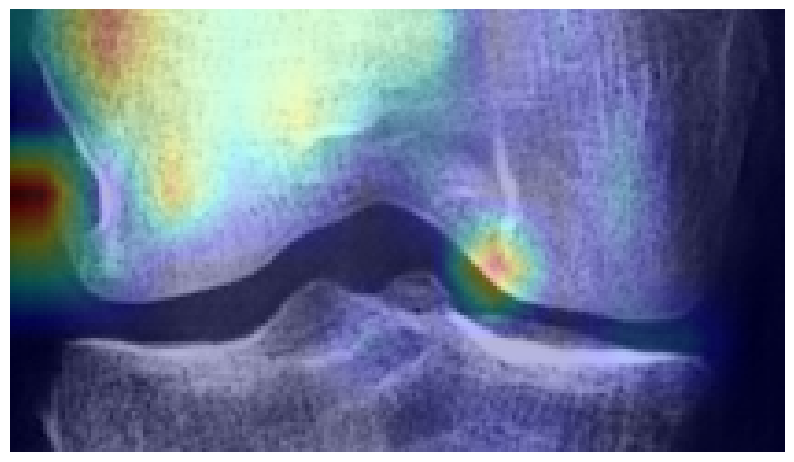

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load and preprocess the original image
    img = load_and_preprocess_image(img_path)

    # Rescale the heatmap to the size of the image
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Convert the heatmap to RGB format
    heatmap = np.uint8(255 * heatmap)
    jet = mpl.colormaps["jet"]
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with the heatmap colorized in RGB
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on the original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Show Grad CAM using Matplotlib
    plt.figure(figsize=(10, 10))  # Set a larger figure size
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

# Save and display Grad-CAM
save_and_display_gradcam(img_path, heatmap)
